In [1]:
import numpy as np  #load up the libraries and object defs. we need
import pandas as pd


from pandas import DataFrame, Series

# load up my visualization system, and call the object plt
import matplotlib.pyplot as plt
import seaborn as sns

# tell ipython notebook to print visualizations inline
%pylab
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
#Set formatting and styles
sns.set_style('ticks',{"ytick.major.size":0, "xtick.major.size":3, 
                       "axes.edgecolor":".5", "xtick.color":".5",
                       "axes.labelcolor":".5", "axes.linewidth":"1.0"})
color_set = sns.color_palette("Blues_r",7) + sns.color_palette("Oranges_r",7) + sns.color_palette("Greens_r",7)
base_colors= color_set[0:3] + color_set[7:10] + color_set[14:17]
search_colors = base_colors[0:4]
navigation_colors = base_colors[7:11]

# Trial Analysis

In [4]:
# Load Full Dataset 
trial_data = pd.read_csv('TimeFile.csv',encoding="utf-8-sig")

#remove training trials
trial_data = trial_data[trial_data["Data Name"] != "carmortality"]

trial_data.sample(5)

,Participant ID,Chart Type,Data Name,Chart Number,Question number,Task number,Time,Task
62,False_Person,HandScaleLego,education,5,1,25,41.00000,Range
5,Pilot_P_1,HandScaleLego,military,1,5,5,33.45605,Range
69,False_Person,TableScaleLego,co2,6,2,32,44.00000,Order
35,Pilot_P_1,TableScaleLego,co2,6,5,35,20.95537,Range
24,Pilot_P_1,PhysicalLego,grosscapital,4,6,24,28.82329,Comparison


In [5]:
split_data = trial_data.copy(deep=True)

# Create combined "ChartxTask" field
for index, row in trial_data.iterrows():
    trial_data.loc[index,"ChartxTask"] = row["Chart Type"] + " " + row["Task"]
    
# Group results by condition and participant
trial_groups = trial_data.groupby(["ChartxTask","Participant ID"],as_index=False).mean()

#TODO - Add error rate to this group
trials_grouped = trial_groups[["ChartxTask","Participant ID", " Time"]]
trials_grouped.sample(5)

,ChartxTask,Participant ID,Time
2,HandScaleLego Order,False_Person,55.250000
13,TableScaleLego Comparison,Pilot_P_1,56.971415
11,PhysicalLego Range,Pilot_P_1,25.444960
7,PhysicalLego Comparison,Pilot_P_1,38.399450
5,HandScaleLego Range,Pilot_P_1,37.904225


### Duration Chart

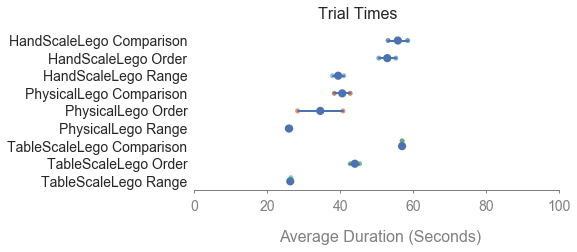

In [6]:
# Plot charts

fp = sns.factorplot(fontsize="14", x=" Time", y="ChartxTask", data=trials_grouped,
                      size=3, aspect=2.5,join=False,
                    scale=0.8, errwidth=2)

plt.setp(fp.ax.lines, zorder=100)
plt.setp(fp.ax.collections, zorder=100)
sns.swarmplot(x=" Time", y="ChartxTask", data=trials_grouped, ax=fp.ax, 
               palette=base_colors, marker="o", size=5, linewidth=0, alpha=0.6)

# Additional Formatting
sns.despine(left=True)
fp.fig.suptitle("Trial Times", fontsize=16,x=0.6, y=1.05)
#fp.set(yticklabels=['','Physical','','','Hand','','','Table','','', 'Room',''])
fp.ax.set_xlim(0, 100)
fp.ax.set_xlabel('Average Duration (Seconds)', fontsize=16)
fp.ax.set_ylabel('',)
fp.ax.tick_params(labelsize=14)
fp.ax.xaxis.set_label_coords(0.51, -0.25)
#plt.setp(fp._legend.get_texts(),fontsize=13)
#plt.setp(fp._legend.get_title(),fontsize=16)


#fp.savefig("exp1-trialtime.pdf", transparent=True, bbox_inches='tight', pad_inches=0)

In [7]:
#Calculate bootstrapped means and confidence intervals for trial times
conditions = []

#Create a list of each condition we're calculating
for index, row in trials_grouped.iterrows():
    if row['ChartxTask'] not in conditions:
        conditions.append(row["ChartxTask"])

#for each of those conditions grab that data and then calcualte the mean and confidence interval        
for c in conditions:
    time_series = trials_grouped[trials_grouped["ChartxTask"] == c][" Time"]
    
    print(c)
    print("Confidence Interval: ", end='')
    print(sns.utils.ci(time_series))
    print("Mean: ", end ='')
    print(np.mean(time_series))
    print()
    

HandScaleLego Comparison
Confidence Interval: [ 53.29387537  58.36650963]
Mean: 55.830192499999995

HandScaleLego Order
Confidence Interval: [ 50.73002919  55.13410331]
Mean: 52.93206625

HandScaleLego Range
Confidence Interval: [ 37.98161937  40.92260563]
Mean: 39.4521125

PhysicalLego Comparison
Confidence Interval: [ 38.50821375  42.64123625]
Mean: 40.574725

PhysicalLego Order
Confidence Interval: [ 28.6481245  40.4396955]
Mean: 34.54391

PhysicalLego Range
Confidence Interval: [ 25.471336  26.473624]
Mean: 25.97248

TableScaleLego Comparison
Confidence Interval: [ 56.97212962  56.99928537]
Mean: 56.9857075

TableScaleLego Order
Confidence Interval: [ 42.81390481  45.24228769]
Mean: 44.02809625

TableScaleLego Range
Confidence Interval: [ 26.14595556  26.49092194]
Mean: 26.31843875



In [8]:
# Compute pairwise for Comparison Task
pivot_dur = trials_grouped.pivot_table(index= "Participant ID", columns="ChartxTask", values=" Time")
#Compare Tasks
pivot_dur["HCompare-TCompare"] = pivot_dur["HandScaleLego Comparison"] - pivot_dur["TableScaleLego Comparison"]
pivot_dur["TCompare-PCompare"] = pivot_dur["TableScaleLego Comparison"] - pivot_dur["PhysicalLego Comparison"]
pivot_dur["HCompare-PCompare"] = pivot_dur["HandScaleLego Comparison"] - pivot_dur["PhysicalLego Comparison"]

pivot_dur["HOrder-TOrder"] = pivot_dur["HandScaleLego Order"] - pivot_dur["TableScaleLego Order"]
pivot_dur["TOrder-POrder"] = pivot_dur["TableScaleLego Order"] - pivot_dur["PhysicalLego Order"]
pivot_dur["HOrder-POrder"] = pivot_dur["HandScaleLego Order"] - pivot_dur["PhysicalLego Order"]

pivot_dur["HRange-TRange"] = pivot_dur["HandScaleLego Range"] - pivot_dur["TableScaleLego Range"]
pivot_dur["TRange-PRange"] = pivot_dur["TableScaleLego Range"] - pivot_dur["PhysicalLego Range"]
pivot_dur["HRange-PRange"] = pivot_dur["HandScaleLego Range"] - pivot_dur["PhysicalLego Range"]

#group for charts
cmp_paired_dur = pivot_dur[["HCompare-TCompare", "TCompare-PCompare", "HCompare-PCompare"]].unstack(level=1)
cmp_paired_dur = cmp_paired_dur.to_frame(name=" Time").reset_index()

rng_paired_dur = pivot_dur[["HRange-TRange", "TRange-PRange", "HRange-PRange"]].unstack(level=1)
rng_paired_dur = rng_paired_dur.to_frame(name=" Time").reset_index()

ord_paired_dur = pivot_dur[["HOrder-TOrder", "TOrder-POrder", "HOrder-POrder"]].unstack(level=1)
ord_paired_dur = ord_paired_dur.to_frame(name=" Time").reset_index()

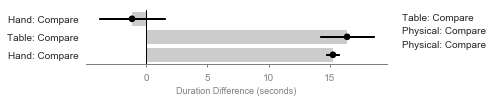

In [9]:
# Plot pairwise differences
fp = sns.factorplot(x=" Time", y="ChartxTask", data=cmp_paired_dur,
                    color="black", join=False, size=1.55, aspect=4, 
                    scale=0.65, errwidth=2)
plt.setp(fp.ax.lines, zorder=100)
plt.setp(fp.ax.collections, zorder=100)
sns.barplot(x=" Time", y="ChartxTask", data=cmp_paired_dur, ax=fp.ax, 
            linewidth=0, errwidth=2, color='0.8')

# Additional Formatting
sns.despine(left=True)
plt.axvline(x=0, linewidth=1, color='black')
fp.ax.set_xlabel('Duration Difference (seconds)', fontsize=9)
fp.ax.set_ylabel('')

# Manually add tick labels
fp.set(yticklabels=['Hand: Compare','Table: Compare', 'Hand: Compare'])
fp.ax.text(1.05, 0.85, 'Table: Compare', horizontalalignment='left', verticalalignment='center', transform=fp.ax.transAxes)
fp.ax.text(1.05, 0.60, 'Physical: Compare', horizontalalignment='left', verticalalignment='center', transform=fp.ax.transAxes)
fp.ax.text(1.05, 0.35, 'Physical: Compare', horizontalalignment='left', verticalalignment='center', transform=fp.ax.transAxes)

#fp.savefig("pairwise-Table.png", transparent=True, bbox_inches='tight', pad_inches=0)

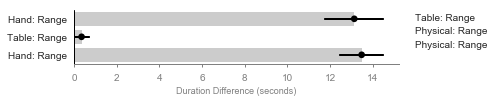

In [10]:
# Plot pairwise differences
fp = sns.factorplot(x=" Time", y="ChartxTask", data=rng_paired_dur,
                    color="black", join=False, size=1.55, aspect=4, 
                    scale=0.65, errwidth=2)
plt.setp(fp.ax.lines, zorder=100)
plt.setp(fp.ax.collections, zorder=100)
sns.barplot(x=" Time", y="ChartxTask", data=rng_paired_dur, ax=fp.ax, 
            linewidth=0, errwidth=2, color='0.8')

# Additional Formatting
sns.despine(left=True)
plt.axvline(x=0, linewidth=1, color='black')
fp.ax.set_xlabel('Duration Difference (seconds)', fontsize=9)
fp.ax.set_ylabel('')

# Manually add tick labels
fp.set(yticklabels=['Hand: Range','Table: Range', 'Hand: Range'])
fp.ax.text(1.05, 0.85, 'Table: Range', horizontalalignment='left', verticalalignment='center', transform=fp.ax.transAxes)
fp.ax.text(1.05, 0.60, 'Physical: Range', horizontalalignment='left', verticalalignment='center', transform=fp.ax.transAxes)
fp.ax.text(1.05, 0.35, 'Physical: Range', horizontalalignment='left', verticalalignment='center', transform=fp.ax.transAxes)

#fp.savefig("pairwise-Table.png", transparent=True, bbox_inches='tight', pad_inches=0)

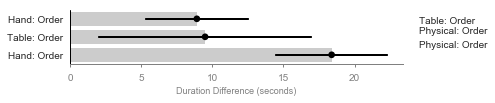

In [11]:
# Plot pairwise differences
fp = sns.factorplot(x=" Time", y="ChartxTask", data=ord_paired_dur,
                    color="black", join=False, size=1.55, aspect=4, 
                    scale=0.65, errwidth=2)
plt.setp(fp.ax.lines, zorder=100)
plt.setp(fp.ax.collections, zorder=100)
sns.barplot(x=" Time", y="ChartxTask", data=ord_paired_dur, ax=fp.ax, 
            linewidth=0, errwidth=2, color='0.8')

# Additional Formatting
sns.despine(left=True)
plt.axvline(x=0, linewidth=1, color='black')
fp.ax.set_xlabel('Duration Difference (seconds)', fontsize=9)
fp.ax.set_ylabel('')

# Manually add tick labels
fp.set(yticklabels=['Hand: Order','Table: Order', 'Hand: Order'])
fp.ax.text(1.05, 0.80, 'Table: Order', horizontalalignment='left', verticalalignment='center', transform=fp.ax.transAxes)
fp.ax.text(1.05, 0.60, 'Physical: Order', horizontalalignment='left', verticalalignment='center', transform=fp.ax.transAxes)
fp.ax.text(1.05, 0.35, 'Physical: Order', horizontalalignment='left', verticalalignment='center', transform=fp.ax.transAxes)

#fp.savefig("pairwise-Table.png", transparent=True, bbox_inches='tight', pad_inches=0)